## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import pylab 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib qt

# Change camare calculate to function
def calibration_camare(images, column_point=6, row_point=9):
    '''
    calibration camare by input images (at list 20 images).
    return ret, mtx, dist, rvecs, tvecs
    '''
    
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((column_point*row_point,3), np.float32)
    objp[:,:2] = np.mgrid[0:row_point,0:column_point].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    img_size = []
    
    # Step through the list and search for chessboard corners
    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
        # Get img_size
        img_size = (img.shape[1], img.shape[0])
        #print(img_size)
        
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            #img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            #cv2.imshow('img',img)
            #cv2.waitKey(500)

    #cv2.destroyAllWindows()     

    # Calibrate Camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    
    # Return
    return ret, mtx, dist

# Make a list of calibration images
calibration_images = glob.glob('camera_cal/calibration*.jpg')

ret, mtx, dist = calibration_camare(calibration_images, 6, 9)

## Apply a distortion correction to raw images

AttributeError: 'Figure' object has no attribute 'imsave'

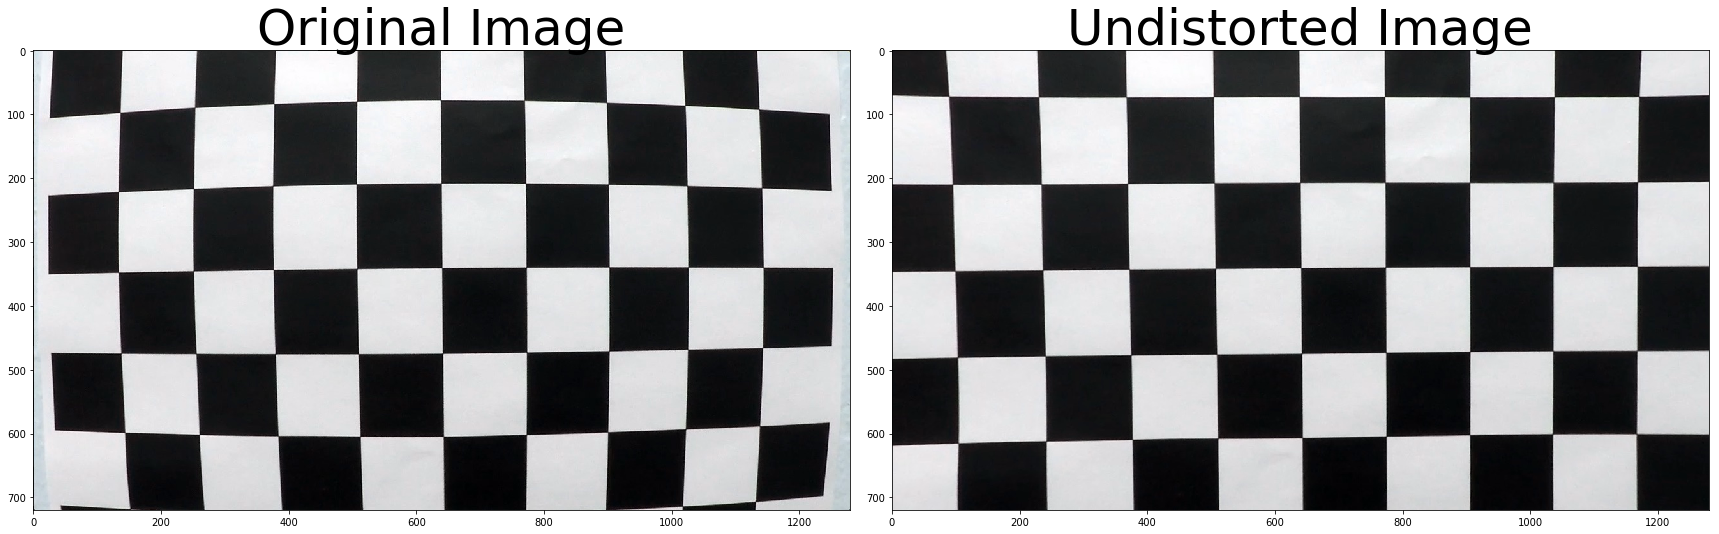

In [20]:
# Create undistort function to output undistort image
def image_undistort(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist


#chess_image = cv2.imread('./camera_cal/calibration1.jpg')
chess_image = cv2.imread('camera_cal/calibration1.jpg')
undist_chess_image = image_undistort(chess_image, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(chess_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist_chess_image)
ax2.set_title('Undistorted Image', fontsize=50)
#plt.savefig('output_images/undistort_chessboard.jpg')
f.imsave('output_images/undistort_chessboard.jpg')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
